# PART 1 - Introduction to Data Science Project
### Data preparationa and visualization of **Predicting NBA Shots**
#### by ***Mario Fernández Rueda***

First of all, we are going to **import all the libraries** we are going to use during all the first part of the project

In [113]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

The first step of the data preparation is to load the data from the csv file to a dataframe.

The csv file has been downloaded from this site: https://www.kaggle.com/dansbecker/nba-shot-logs

In [114]:
# load the data
df = pd.read_csv('shot_logs.csv')

# print the first 5 rows of the data to see if the data was loaded correctly and
# and the structure of the dataframe
df.head()

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


According to the pdf file we have the following features used to train the predicting model:

* location (home or away game)
* game outcome (win/loss)
* final point margin
* player shot number
* game period
* game clock
* shot clock
* player dribbles
* ball touch time
* shot distance
* points type (2 or 3 point attempt)
* closest defender
* closest defender id
* closest defender distance
* field goal made
* points scored
* player name
* player id

This makes a total of 18 features that appear in the dataframe.

In our dataframe there are also 2 features that don't give us information to predict the shot. These are GAME_ID and MATCHUP and are used to help us to identify the match where the shot was performed, and therefore to identify the shot.

We also have the feature SHOT_RESULT that is the one which contains the information about if a shot was made or not. This is the information we will try to predict.

This makes a total of 21 features. 

The file also indicates that the dataset have 122502 observations. 

Let's see if everything of both, features and observations, are in the dataframe:

In [115]:
print(f"There are {df.shape[1]} features and {df.shape[0]} observations in the dataset.")

There are 21 features and 128069 observations in the dataset.


The number of features is the same but the number of observations not. The number of the pdf file is 6K lower than the csv file number of observations. 

This is not an aspect we have to worry about, because the csv file could have been modified or updated with more examples after the publication of the pdf file report. The important aspect is that we have at least the number the number that appears in the report.

We can conclude that **the data was loaded correctly**.

Now, let's check the data types of the data frame:

In [116]:
print(f"The features types are:")

# print the type of each feature in the dataframe using the first row of the dataframe
for column in df.columns:
    print(f"{column} -> {type(df[column][0])}")

The features types are:
GAME_ID -> <class 'numpy.int64'>
MATCHUP -> <class 'str'>
LOCATION -> <class 'str'>
W -> <class 'str'>
FINAL_MARGIN -> <class 'numpy.int64'>
SHOT_NUMBER -> <class 'numpy.int64'>
PERIOD -> <class 'numpy.int64'>
GAME_CLOCK -> <class 'str'>
SHOT_CLOCK -> <class 'numpy.float64'>
DRIBBLES -> <class 'numpy.int64'>
TOUCH_TIME -> <class 'numpy.float64'>
SHOT_DIST -> <class 'numpy.float64'>
PTS_TYPE -> <class 'numpy.int64'>
SHOT_RESULT -> <class 'str'>
CLOSEST_DEFENDER -> <class 'str'>
CLOSEST_DEFENDER_PLAYER_ID -> <class 'numpy.int64'>
CLOSE_DEF_DIST -> <class 'numpy.float64'>
FGM -> <class 'numpy.int64'>
PTS -> <class 'numpy.int64'>
player_name -> <class 'str'>
player_id -> <class 'numpy.int64'>


Then, let's check some **statistics** of the columns that are numeric from the information given in the data frame. We can do it by two different ways:

1. With the describe method

In [117]:
# statistical summary of the data
df.describe()

,GAME_ID,FINAL_MARGIN,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_id
count,1.280690e+05,128069.000000,128069.000000,128069.000000,122502.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000
mean,2.140045e+07,0.208723,6.506899,2.469427,12.453344,2.023355,2.765901,13.571504,2.264670,159038.487284,4.123015,0.452139,0.997314,157238.251247
std,2.578773e+02,13.233267,4.713260,1.139919,5.763265,3.477760,3.043682,8.888964,0.441159,78791.172947,2.756446,0.497706,1.130978,79362.389336
min,2.140000e+07,-53.000000,1.000000,1.000000,0.000000,0.000000,-163.600000,0.000000,2.000000,708.000000,0.000000,0.000000,0.000000,708.000000
25%,2.140023e+07,-8.000000,3.000000,1.000000,8.200000,0.000000,0.900000,4.700000,2.000000,101249.000000,2.300000,0.000000,0.000000,101162.000000
50%,2.140045e+07,1.000000,5.000000,2.000000,12.300000,1.000000,1.600000,13.700000,2.000000,201949.000000,3.700000,0.000000,0.000000,201939.000000
75%,2.140067e+07,9.000000,9.000000,3.000000,16.675000,2.000000,3.700000,22.500000,3.000000,203079.000000,5.300000,1.000000,2.000000,202704.000000
max,2.140091e+07,53.000000,38.000000,7.000000,24.000000,32.000000,24.900000,47.200000,3.000000,530027.000000,53.200000,1.000000,3.000000,204060.000000


2. Or by typing the statistics you want to obtain:

In [118]:
#iterative loop for the columns
for column in df.columns:
    #condition to check if the column is numeric
    #and if the column is not the GAME_ID, CLOSEST_DEFENDER_PLAYER_ID or player_id because they are numeric but they don't make sense to calculate the statistics because they are only ids
    if (((type(df[column][0]) == np.float64) or (type(df[column][0]) == np.int64)) and (column != 'GAME_ID') and (column != 'player_id') and (column != 'CLOSEST_DEFENDER_PLAYER_ID')):
        print(column, ":")
        print("\tmean =", df[column].mean())
        print("\tstd =", df[column].std())
        print("\tmedian =", df[column].median())
        print("\tmin =", df[column].min())
        print("\tmax =", df[column].max())
        print("\t25% =", df[column].quantile(0.25))
        print("\t50% =", df[column].quantile(0.5))
        print("\t75% =", df[column].quantile(0.75))
        print("\tmode =", df[column].mode()[0])
        print()


FINAL_MARGIN :
	mean = 0.2087234225300424
	std = 13.233266998488817
	median = 1.0
	min = -53
	max = 53
	25% = -8.0
	50% = 1.0
	75% = 9.0
	mode = -5

SHOT_NUMBER :
	mean = 6.506898624959983
	std = 4.7132596764374295
	median = 5.0
	min = 1
	max = 38
	25% = 3.0
	50% = 5.0
	75% = 9.0
	mode = 1

PERIOD :
	mean = 2.4694266372033824
	std = 1.1399190614984114
	median = 2.0
	min = 1
	max = 7
	25% = 1.0
	50% = 2.0
	75% = 3.0
	mode = 1

SHOT_CLOCK :
	mean = 12.453343618879694
	std = 5.763265011581127
	median = 12.3
	min = 0.0
	max = 24.0
	25% = 8.2
	50% = 12.3
	75% = 16.675
	mode = 24.0

DRIBBLES :
	mean = 2.023354597912063
	std = 3.4777604804228224
	median = 1.0
	min = 0
	max = 32
	25% = 0.0
	50% = 1.0
	75% = 2.0
	mode = 0

TOUCH_TIME :
	mean = 2.765901193887669
	std = 3.0436822353959467
	median = 1.6
	min = -163.6
	max = 24.9
	25% = 0.9
	50% = 1.6
	75% = 3.7
	mode = 0.8

SHOT_DIST :
	mean = 13.571504423396759
	std = 8.888963591877474
	median = 13.7
	min = 0.0
	max = 47.2
	25% = 4.7
	50% = 13.7


Once we have seen some of the statistics, we can start with the **data cleaning and preparation** of the dataframe.

There are some inconsistencies I have seen in the loaded data:

1. The first inconsistency is the one I commented above: the FGM and SHOT_RESULT columns seems to have the same information but with different data types. Let's check it.

In [119]:
# check if the values from FGM and SHOT_RESULT

fgm = df['FGM'].value_counts()
fgm_index = fgm.index
fgm_values = fgm.values

shot_result = df['SHOT_RESULT'].value_counts()
shot_result_index = shot_result.index
shot_result_values = shot_result.values

for i in range(len(fgm_index)):
    print(f"The number of {fgm_index[i]} in the FGM column is {fgm_values[i]}")

for i in range(len(shot_result_index)):
    print(f"The number of '{shot_result_index[i]}' in the SHOT_RESULT column is {shot_result_values[i]}")




The number of 0 in the FGM column is 70164
The number of 1 in the FGM column is 57905
The number of 'missed' in the SHOT_RESULT column is 70164
The number of 'made' in the SHOT_RESULT column is 57905


Looking at the results we can confirm that both columns have the same information, so we can remove one of them. I decided to remove the SHOT_RESULT one, because it is a string type characteristic and it is better to have a numeric one with two types (0,1) that emulates a boolean to make the calculations and analysis easier, so that's why we are going to keep the FGM column.

In [120]:
# drop the column SHOT_RESULT because it is the same as FGM
df.drop('SHOT_RESULT', axis=1, inplace=True)

2. The second one is that the column TOUCH_TIME has negative values as the minimum value of it is -163 and we can not have negative time. So we have here outliers.

In [121]:
# check how many rows have negative values for the column TOUCH_TIME
print(f"Number of negative values for TOUCH_TIME is {len(df[df['TOUCH_TIME'] < 0])}")

Number of negative values for TOUCH_TIME is 312


As there is no explanation to that values we are going to replace that values with the mean value of the posible values rows (TOUCH_TIME >= 0):

In [122]:
# values of TOUCH_TIME that are greater or equal to 0
posible_values = df.loc[df['TOUCH_TIME'] >= 0, 'TOUCH_TIME'].values

# calculate the mean of TOUCH_TIME without the negative values
mean_touch_time = np.mean(posible_values)
mean_touch_time

# replace the negative values with the mean of TOUCH_TIME
df.loc[df['TOUCH_TIME'] < 0, 'TOUCH_TIME'] = mean_touch_time

# check NOW again after the changes if there are negative values in TOUCH_TIME
print(f"Number of negative values for TOUCH_TIME is {len(df[df['TOUCH_TIME'] < 0])}")

if (len(df[df['TOUCH_TIME'] < 0]) == 0):
    print("Values changed successfully")


Number of negative values for TOUCH_TIME is 0
Values changed successfully


Let's see now the number of missing values in every column:

In [123]:
# the sum of the missing values in each column
df.isna().sum()

GAME_ID                          0
MATCHUP                          0
LOCATION                         0
W                                0
FINAL_MARGIN                     0
SHOT_NUMBER                      0
PERIOD                           0
GAME_CLOCK                       0
SHOT_CLOCK                    5567
DRIBBLES                         0
TOUCH_TIME                       0
SHOT_DIST                        0
PTS_TYPE                         0
CLOSEST_DEFENDER                 0
CLOSEST_DEFENDER_PLAYER_ID       0
CLOSE_DEF_DIST                   0
FGM                              0
PTS                              0
player_name                      0
player_id                        0
dtype: int64

Only the SHOT_CLOCK feature has null values. Unlike the inconsistency found in TOUCH_TIME above, this lack of values have an explanation. When the remaining time of each period is lower than 24 seconds of the game clock, we have no time in the shot clock, because there is no need to activate the shot_clock: the game clock time will be used up before clock time is used up. So we need to replace this missing values for the value of the game clock in case the game clock is less than or equal to 24 seconds:

In [124]:
#because is a string we need to convert the column to a numeric value
#we will convert from minute:second to seconds
def convert_to_seconds(time):
    minutes, seconds = time.split(':')
    return int(minutes) * 60 + int(seconds)

# apply the function to the column GAME_CLOCK
df['GAME_CLOCK'] = df['GAME_CLOCK'].apply(convert_to_seconds)

#once we have the column converted to seconds we can get the replacing values
replace = df.loc[(df['SHOT_CLOCK'].isna()) & (df['GAME_CLOCK'] <= 24), 'GAME_CLOCK'].values

#replace the missing values
df.loc[(df['SHOT_CLOCK'].isna()) & (df['GAME_CLOCK'] <= 24), 'SHOT_CLOCK'] = replace

#check how many missing values are in SHOT_CLOCK
print(f"Number of missing values for SHOT_CLOCK is {df['SHOT_CLOCK'].isna().sum()}")


Number of missing values for SHOT_CLOCK is 2013


We can see that there are still missing values. There is no explanation for them so the best solution is to replace the remaing missing values with the mean of the SHOT_CLOCK values.

In [125]:
# replace the missing values in SHOT_CLOCK with the mean of the column
replace = df['SHOT_CLOCK'].mean()

df.loc[df['SHOT_CLOCK'].isna(), 'SHOT_CLOCK'] = replace

#check how many missing values are in SHOT_CLOCK
print(f"Number of missing values for SHOT_CLOCK is {df['SHOT_CLOCK'].isna().sum()}")

Number of missing values for SHOT_CLOCK is 0


Now that we have no inconsistencies and we have no missing values, it is time to replace the string values to numeric ones when it is posible. For example, MATCHUP, CLOSEST_DEFENDER or player_name are not going to be reaplced, but W (win) and LOCATION are going to be replaced.

As both are columns with binary values, the best option is to use OneHot Encoder because we are only going to have one more column than the original dataframe once tranformed.

In [126]:
#one hot encoding
onehot = OneHotEncoder(handle_unknown='ignore')

# fit the encoder with 'W' column
onehot.fit(df[['W']])

# create the exmaples transformed with the encoder
transformed_W = onehot.transform(df[['W']])

# create a DataFrame with the examples transformed with index=score.index to keep the same index as the original DataFrame 
# and columns=onehot.get_feature_names_out(['W']) to get the original column out
transformed_W = pd.DataFrame(transformed_W.toarray(), index=df.index, columns=onehot.get_feature_names_out(['W']))

# same procedure with 'LOCATION' column
onehot.fit(df[['LOCATION']])
transformed_LOCATION = onehot.transform(df[['LOCATION']])
transformed_LOCATION = pd.DataFrame(transformed_LOCATION.toarray(), index=df.index, columns=onehot.get_feature_names_out(['LOCATION']))

# Concatenate the original DataFrame with the cretaed ones with the one hot encoding
df = pd.concat((df, transformed_W, transformed_LOCATION), axis=1)

# drop the original columns because we don't need them anymore
df = df.drop('W', axis=1)
df = df.drop('LOCATION', axis=1)

# check the different columns of the dataframe
print(df.columns)

# check the first 5 rows of the new DataFrame
df.head()

Index(['GAME_ID', 'MATCHUP', 'FINAL_MARGIN', 'SHOT_NUMBER', 'PERIOD',
       'GAME_CLOCK', 'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME', 'SHOT_DIST',
       'PTS_TYPE', 'CLOSEST_DEFENDER', 'CLOSEST_DEFENDER_PLAYER_ID',
       'CLOSE_DEF_DIST', 'FGM', 'PTS', 'player_name', 'player_id', 'W_L',
       'W_W', 'LOCATION_A', 'LOCATION_H'],
      dtype='object')


,GAME_ID,MATCHUP,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,...,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id,W_L,W_W,LOCATION_A,LOCATION_H
0,21400899,"MAR 04, 2015 - CHA @ BKN",24,1,1,69,10.8,2,1.9,7.7,...,101187,1.3,1,2,brian roberts,203148,0.0,1.0,1.0,0.0
1,21400899,"MAR 04, 2015 - CHA @ BKN",24,2,1,14,3.4,0,0.8,28.2,...,202711,6.1,0,0,brian roberts,203148,0.0,1.0,1.0,0.0
2,21400899,"MAR 04, 2015 - CHA @ BKN",24,3,1,0,0.0,3,2.7,10.1,...,202711,0.9,0,0,brian roberts,203148,0.0,1.0,1.0,0.0
3,21400899,"MAR 04, 2015 - CHA @ BKN",24,4,2,707,10.3,2,1.9,17.2,...,203900,3.4,0,0,brian roberts,203148,0.0,1.0,1.0,0.0
4,21400899,"MAR 04, 2015 - CHA @ BKN",24,5,2,634,10.9,2,2.7,3.7,...,201152,1.1,0,0,brian roberts,203148,0.0,1.0,1.0,0.0


With this we finish with the data cleaning preparation. Now it is time to the **data visualization**.

* **Graphic that shows the distribution of the distance of the shots and its frequency**

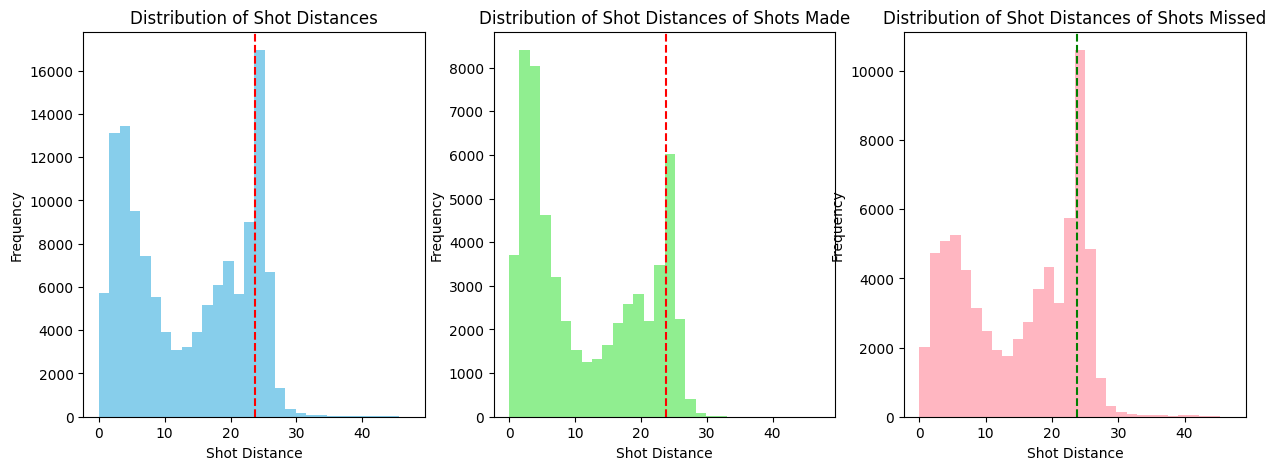

In [137]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# all shots
axes[0].hist(df['SHOT_DIST'], bins=30, color='skyblue')
axes[0].axvline(x=23.75, color='r', linestyle='--')
axes[0].set_title('Distribution of Shot Distances')
axes[0].set_xlabel('Shot Distance')
axes[0].set_ylabel('Frequency')

# shots made
axes[1].hist(df.loc[df['FGM']==1,'SHOT_DIST'], bins=30, color='lightgreen')
axes[1].axvline(x=23.75, color='r', linestyle='--')
axes[1].set_title('Distribution of Shot Distances of Shots Made')
axes[1].set_xlabel('Shot Distance')
axes[1].set_ylabel('Frequency')

# shots missed
axes[2].hist(df.loc[df['FGM']==0,'SHOT_DIST'], bins=30, color='#FFB6C1')
axes[2].axvline(x=23.75, color='g', linestyle='--')
axes[2].set_title('Distribution of Shot Distances of Shots Missed')
axes[2].set_xlabel('Shot Distance')
axes[2].set_ylabel('Frequency')

plt.show()


We can see that the most frequent place to miss shots is the 3 point line and the best place to have a made shot is near to the basket.

* **Graphic that shows the accuracy of shots when Kawhi Leonard (Best defender) is defending and any player is defending**


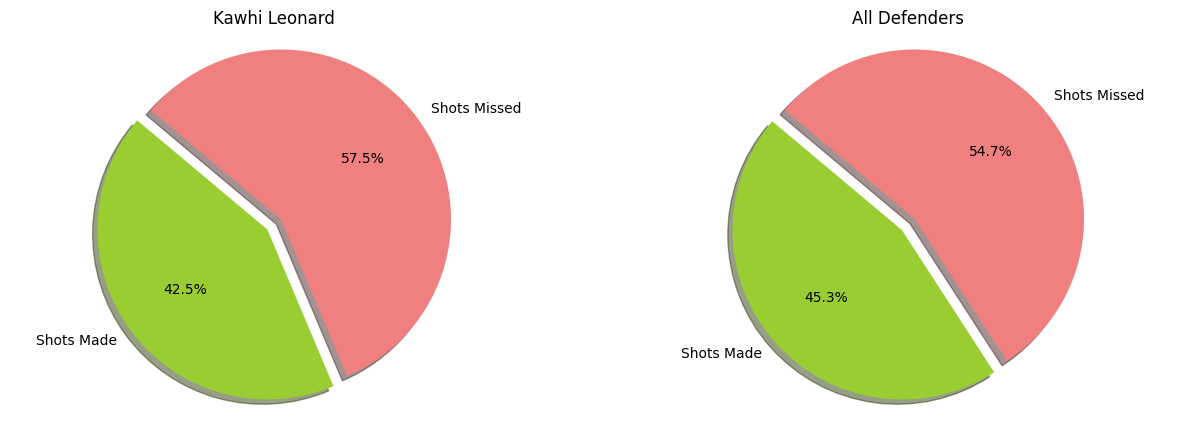

In [147]:
made_kw = df.loc[(df['CLOSEST_DEFENDER'] == 'Leonard, Kawhi') & (df['CLOSE_DEF_DIST'] < 2) & (df['FGM'] == 1), 'SHOT_DIST']
total_made_kw = len(made_kw)

missed_kw = df.loc[(df['CLOSEST_DEFENDER'] == 'Leonard, Kawhi') & (df['CLOSE_DEF_DIST'] < 2) & (df['FGM'] == 0), 'SHOT_DIST']
total_missed_kw = len(missed_kw)

# Data for all defenders
made_all = df.loc[(df['CLOSE_DEF_DIST'] < 2) & (df['FGM'] == 1), 'SHOT_DIST']
total_made_all = len(made_all)

missed_all = df.loc[(df['CLOSE_DEF_DIST'] < 2) & (df['FGM'] == 0), 'SHOT_DIST']
total_missed_all = len(missed_all)

# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Data to plot
labels = 'Shots Made', 'Shots Missed'
colors = ['yellowgreen', 'lightcoral']
explode = (0.1, 0)  # explode 1st slice

# Plot for Kawhi Leonard
axes[0].pie([total_made_kw, total_missed_kw], explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
axes[0].set_title('Kawhi Leonard')
axes[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Plot for all defenders
axes[1].pie([total_made_all, total_missed_all], explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
axes[1].set_title('All Defenders')
axes[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


Clearly wins Kawhi's defense.

* **Graphic that shows Curry vs James 2 pts and 3 pts**

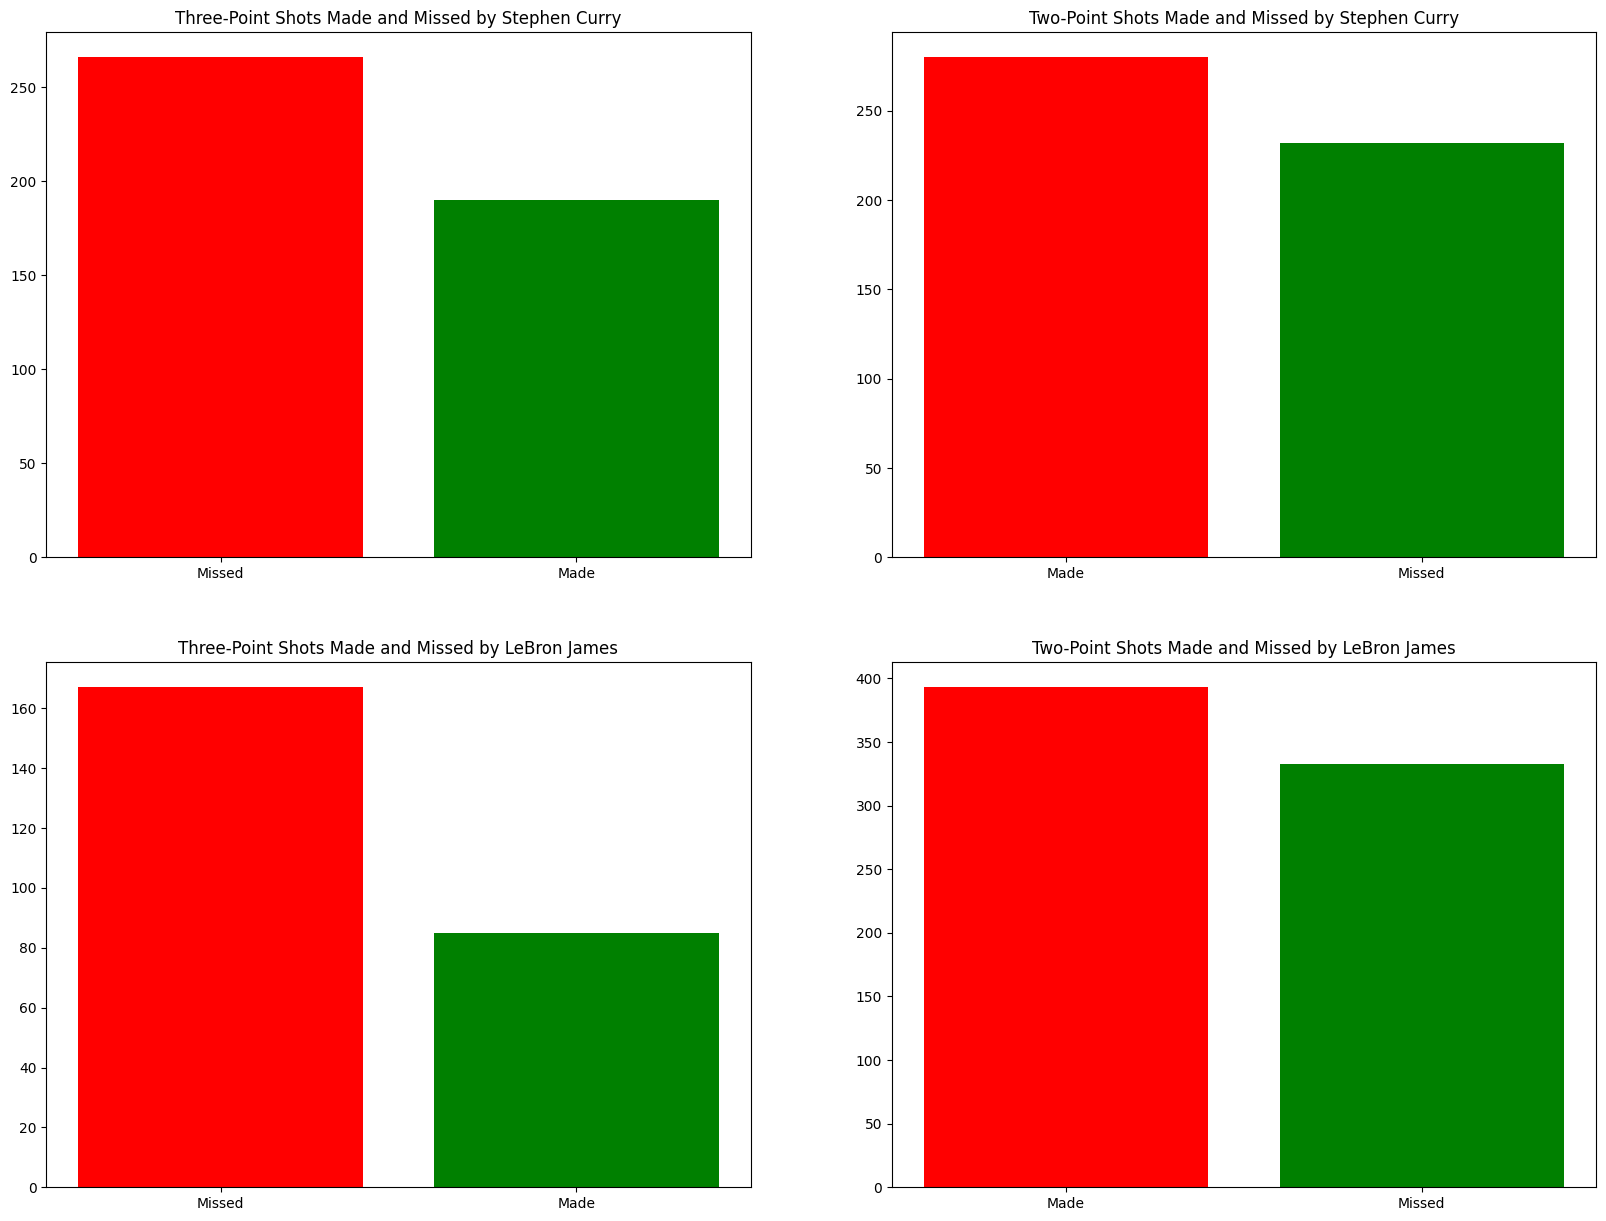

In [167]:
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# Filter data for Stephen Curry's three-point shots
curry_threes = df.loc[(df['player_name'] == 'stephen curry') & (df['PTS_TYPE'] == 3)]

# Count made and missed shots
curry_threes_counts = curry_threes['FGM'].value_counts()

# Create labels
labels = ['Missed', 'Made'] if len(curry_threes_counts) > 0 and curry_threes_counts.index[0] == 0 else ['Made', 'Missed']

# Plot bar chart
axes[0][0].bar(labels, curry_threes_counts.values, color=['red', 'green'])
axes[0][0].set_title('Three-Point Shots Made and Missed by Stephen Curry')


# Filter data for Stephen Curry's two-point shots
curry_twos = df.loc[(df['player_name'] == 'stephen curry') & (df['PTS_TYPE'] == 2)]

# Count made and missed shots
curry_twos_counts = curry_twos['FGM'].value_counts()

# Create labels
labels = ['Missed', 'Made'] if len(curry_twos_counts) > 0 and curry_twos_counts.index[0] == 0 else ['Made', 'Missed']

# Plot bar chart
axes[0][1].bar(labels, curry_twos_counts.values, color=['red', 'green'])
axes[0][1].set_title('Two-Point Shots Made and Missed by Stephen Curry')


# Filter data for LeBron James's three-point shots
james_threes = df.loc[(df['player_name'] == 'lebron james') & (df['PTS_TYPE'] == 3)]

# Count made and missed shots
james_threes_counts = james_threes['FGM'].value_counts()

# Create labels
labels = ['Missed', 'Made'] if len(james_threes_counts) > 0 and james_threes_counts.index[0] == 0 else ['Made', 'Missed']

# Plot bar chart
axes[1][0].bar(labels, james_threes_counts.values, color=['red', 'green'])
axes[1][0].set_title('Three-Point Shots Made and Missed by LeBron James')

# Filter data for LeBron James's two-point shots
james_twos = df.loc[(df['player_name'] == 'lebron james') & (df['PTS_TYPE'] == 2)]

# Count made and missed shots
james_twos_counts = james_twos['FGM'].value_counts()

# Create labels
labels = ['Missed', 'Made'] if len(james_twos_counts) > 0 and james_twos_counts.index[0] == 0 else ['Made', 'Missed']

# Plot bar chart
axes[1][1].bar(labels, james_twos_counts.values, color=['red', 'green'])
axes[1][1].set_title('Two-Point Shots Made and Missed by LeBron James')

plt.show()




Curry wins in 3 pointers but James wins in 2 pointers.